# <font color=blue>Assignments for "Imbalanced Data"</font>

Using the [dataset](https://sci2s.ugr.es/keel/dataset/data/imbalanced/cleveland-0_vs_4.zip) for the [risk of heart attack](https://sci2s.ugr.es/keel/dataset.php?cod=980) with class imbalance:

1. Create a logistic regression model and measure the performance of it.
2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.dat',skiprows = 18,error_bad_lines=False)
df.columns =['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'] 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
1,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
2,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
3,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative
4,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
172,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive
173,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,positive
174,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       176 non-null    float64
 1   sex       176 non-null    float64
 2   cp        176 non-null    float64
 3   trestbps  176 non-null    float64
 4   chol      176 non-null    float64
 5   fbs       176 non-null    float64
 6   restecg   176 non-null    float64
 7   thalach   176 non-null    float64
 8   exang     176 non-null    float64
 9   oldpeak   176 non-null    float64
 10  slope     176 non-null    float64
 11  ca        176 non-null    object 
 12  thal      176 non-null    object 
 13  num       176 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,176.0,53.051136,9.657725,29.0,45.00,53.0,59.25,77.0
sex,176.0,0.579545,0.495040,0.0,0.00,1.0,1.00,1.0
cp,176.0,2.869318,0.931954,1.0,2.00,3.0,4.00,4.0
trestbps,176.0,129.863636,16.424847,94.0,120.00,130.0,140.00,180.0
chol,176.0,243.488636,54.500326,126.0,208.75,234.5,269.00,564.0
fbs,176.0,0.130682,0.338014,0.0,0.00,0.0,0.00,1.0
restecg,176.0,0.886364,0.990605,0.0,0.00,0.0,2.00,2.0
thalach,176.0,157.113636,19.795487,96.0,145.75,160.0,172.00,202.0
exang,176.0,0.164773,0.372034,0.0,0.00,0.0,0.00,1.0
oldpeak,176.0,0.707955,0.948590,0.0,0.00,0.3,1.20,4.4


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
df["ca"].unique()

array(['0.0', '2.0', '1.0', '3.0', '<null>'], dtype=object)

In [7]:
df["thal"].unique()

array(['3.0', '6.0', '7.0', '<null>'], dtype=object)

In [8]:
df["num"].unique()

array(['negative', 'positive'], dtype=object)

In [9]:
df['thal'] = pd.to_numeric(df['thal'], errors = 'coerce')
df['ca'] = pd.to_numeric(df['ca'], errors = 'coerce')

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        1
num         0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["thal"] = imp_mean.fit_transform(df[["thal"]])

In [12]:
imp_mean2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["ca"] = imp_mean2.fit_transform(df[["ca"]])

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

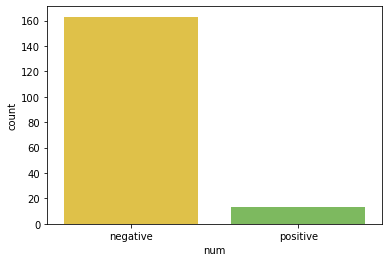

In [14]:
sns.countplot(df["num"],palette=['#F8D030','#78C850']) # this plot shows "our data is imbalanced"

In [15]:
df["num"]=pd.get_dummies(df["num"], drop_first=True)

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
1,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
2,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
3,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
4,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,1
172,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,1
173,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,1
174,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [19]:
X = df.drop('num', axis=1)
y = df['num']

create_model(X,y)

Accuracy : 0.9444444444444444

Train Dataset
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.70      0.82        10

    accuracy                           0.98       140
   macro avg       0.99      0.85      0.91       140
weighted avg       0.98      0.98      0.98       140

Test Dataset
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.33      0.50         3

    accuracy                           0.94        36
   macro avg       0.97      0.67      0.74        36
weighted avg       0.95      0.94      0.93        36



## Up-Sampling

In [23]:
from sklearn.utils import resample
negative= df[df.num == 0]
positive = df[df.num == 1]

positive_upsampled = resample(positive,
                                         replace = True,
                                         n_samples = len(negative),
                                         random_state = 111)

upsampled_df = pd.concat([negative, positive_upsampled])
upsampled_df.num.value_counts()

1    163
0    163
Name: num, dtype: int64

In [24]:
X = upsampled_df.drop('num', axis=1)
y = upsampled_df['num']

create_model(X,y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       130
           1       0.94      1.00      0.97       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



## Down-Sampling

In [25]:
negative = df[df.num == 0]
positive = df[df.num == 1]

positive_downsampled = resample(negative,
                                         replace = True,
                                         n_samples = len(positive),
                                         random_state = 111)

downsampled_df = pd.concat([positive, positive_downsampled])
downsampled_df.num.value_counts()

1    13
0    13
Name: num, dtype: int64

In [26]:
X = downsampled_df.drop('num', axis=1)
y = downsampled_df['num']

create_model(X,y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

y = df.num
X = df.drop('num', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [29]:
create_model(X_smote, y_smote)

Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       130
           1       0.96      0.99      0.97       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



## ADASYN

In [30]:
from imblearn.over_sampling import ADASYN

y = df.num
X = df.drop('num', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [31]:
create_model(X_adasyn, y_adasyn)

Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       130
           1       0.94      1.00      0.97       132

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66

